## 1. Fragestellungen und Datenbeschaffung

### 1.1 Fragestellung:
1. Wie hat sich der Anteil unterernährter Menschen weltweit zwischen 2000 und 2022 verändert?
2. Welche 6 Länder sind im Jahr 2022 am stärksten von Unterernährung betroffen?
3. Welche 6 Länder sind im Jahr 2022 am niedrigsten von Unterernährung betroffen?
4. Gibt es einen Zusammenhang zwischen Unterernährung und wirtschaftlichen Faktoren?
5. Gibt es Länder, in denen die Unterernährungsrate besonders stark gesunken oder gestiegen ist?


Bildgröße: (1280, 658)


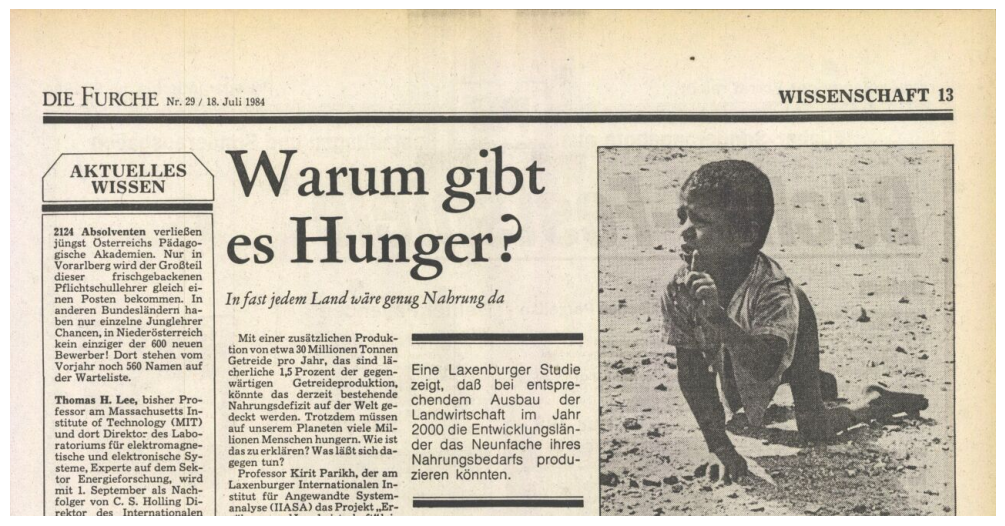

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('Bild_1.jpg')

print("Bildgröße:", img.size)

plt.figure(figsize=(img.width/100, img.height/100), dpi=100)
plt.imshow(img)
plt.axis('off')
plt.show()

## 2. Unsere Rohdaten

In [4]:
import pandas as pd
import zipfile

zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

old_col_name = next(col for col in df.columns 
                    if "Prevalence of undernourishment" in col)

df = df.rename(columns={old_col_name: "Prevalence (%)"})

df.head()

,Entity,Code,Year,Prevalence (%)
0,Afghanistan,AFG,2001,46.0
1,Afghanistan,AFG,2002,43.7
2,Afghanistan,AFG,2003,38.6
3,Afghanistan,AFG,2004,35.9
4,Afghanistan,AFG,2005,34.2


## 3. Pivottabelle 


In [6]:
import pandas as pd
df_pivot = df.pivot_table(
    index='Entity',
    columns='Year',
    values='Prevalence (%)',
    aggfunc='mean'
)
pd.set_option('display.max_rows', 50)
pd.reset_option('display.max_columns')
df_pivot

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,46.0,43.7,38.6,35.9,34.2,31.6,28.3,25.1,21.6,...,19.3,20.0,20.5,21.4,22.6,25.1,27.7,29.4,30.4,NaN
Africa (FAO),22.9,22.2,21.8,21.5,21.0,19.9,18.8,18.3,17.5,17.0,...,15.5,16.0,16.8,16.7,17.1,17.4,18.8,19.3,19.9,20.4
Albania,NaN,4.9,6.0,7.4,8.6,8.9,8.9,8.4,7.4,6.2,...,4.5,4.4,4.3,4.3,4.2,4.3,4.4,4.3,4.5,NaN
Algeria,NaN,7.5,6.8,6.5,6.5,6.2,6.0,5.5,5.2,4.8,...,2.7,2.6,2.6,2.5,2.5,2.5,2.5,2.5,2.5,NaN
Americas (FAO),6.5,6.3,6.6,6.0,5.9,5.6,5.2,5.0,4.6,4.6,...,3.2,3.3,3.8,3.6,3.7,3.6,4.1,4.4,4.2,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Europe (FAO),2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5
World,12.8,12.9,13.2,12.9,12.7,12.2,11.2,10.1,9.5,9.2,...,7.3,7.7,7.6,7.1,7.2,7.5,8.5,9.0,9.1,9.1
Yemen,NaN,24.4,25.3,25.7,26.0,25.5,24.4,23.8,23.7,22.2,...,32.4,38.1,41.3,42.0,40.2,38.4,36.7,36.9,39.5,NaN


Mithilfe dieser Tabelle werden wir auch unsere Diagramme erstellen

## 4 Daten vorbereiten
### 4.1 Überblick: Format des Datensatzes und Spaltenstruktur

4.1.1 Format des Datensatzes & Spaltenstruktur

In [7]:
print("Spalten im Datensatz:")
print(list(df.columns))

print("\nDatentypen der Spalten:")
print(df.dtypes)

print("\nErste 5 Zeilen des DataFrames:")
df.head()


Spalten im Datensatz:
['Entity', 'Code', 'Year', 'Prevalence (%)']

Datentypen der Spalten:
Entity             object
Code               object
Year                int64
Prevalence (%)    float64
dtype: object

Erste 5 Zeilen des DataFrames:


,Entity,Code,Year,Prevalence (%)
0,Afghanistan,AFG,2001,46.0
1,Afghanistan,AFG,2002,43.7
2,Afghanistan,AFG,2003,38.6
3,Afghanistan,AFG,2004,35.9
4,Afghanistan,AFG,2005,34.2


Die ersten fünf Zeilen unseres DataFrames geben einen schnellen Überblick über den Aufbau des Datensatzes. Der Datensatz enthält für jedes Land bzw. jede Region den Ländercode, das zugehörige Jahr sowie den Anteil der unterernährten Bevölkerung. Die Daten sind chronologisch nach Jahren geordnet, innerhalb eines Jahres erscheinen die Länder alphabetisch. Dadurch lässt sich die Struktur des Datensatzes klar erkennen und eine erste Einschätzung der Werte ist möglich.

4.1.2 Struktur und Qualität des Datensatzes

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4683 entries, 0 to 4682
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          4683 non-null   object 
 1   Code            3843 non-null   object 
 2   Year            4683 non-null   int64  
 3   Prevalence (%)  4683 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 146.5+ KB


Die Funktion df.info() liefert eine kompakte Übersicht über die Struktur und Qualität des Datensatzes. Sie zeigt die Spaltennamen, die jeweiligen Datentypen sowie die Anzahl der vorhandenen Werte pro Spalte. Dadurch wird sichtbar, dass fast alle Variablen vollständig vorliegen – mit Ausnahme des Ländercodes („Code“), bei dem einige Werte fehlen. Zusätzlich gibt die Ausgabe Informationen zur Gesamtzahl der Einträge und zum Speicherverbrauch des DataFrames, was eine erste Einschätzung der Datenqualität ermöglicht.

*Grösse und Umfang*

*Anzahl der Einträge:*

- Der DataFrame umfasst insgesamt 4683 Beobachtungen (Zeilen).
- Die Zeilen sind fortlaufend von 0 bis 4 682 nummeriert.
- Der Datensatz enthält 4 Variablen (Spalten): Entity, Code, Year und Prevalence (%).

*Datenqualität (Fehlwerte)*

*Fehlende Daten*

- Die Spalte Code enthält nur 3843 Nicht-Null-Einträge. Da es insgesamt 4683 Zeilen gibt, fehlen in dieser Spalte 840 Werte (4683 - 3843 = 840).

Folgerung: Diese fehlenden Werte in der Länderkodierung müssen vor einer Analyse, die den Code benötigt, überprüft werden. 
Vollständige Daten: Die Spalten Entity, Year und Prevalence (%) sind vollständig 4683 non-null und weisen keine NULL-Werte auf.

In [ ]:
print(df.isnull().sum())
print("\nGesamt fehlende Werte:", df.isnull().sum().sum())


Entity              0
Code              840
Year                0
Prevalence (%)      0
dtype: int64

Gesamt fehlende Werte: 840


### 4.2 Statistische Übersicht

In [11]:
df.describe()[['Year', 'Prevalence (%)']]

,Year,Prevalence (%)
count,4683.000000,4683.000000
mean,2011.511211,11.057015
std,6.461964,10.785757
min,2000.000000,2.500000
25%,2006.000000,2.500000
50%,2012.000000,6.600000
75%,2017.000000,16.000000
max,2023.000000,71.400000


Die Funktion df.describe() liefert eine Zusammenfassung der Zahlen: Year und Prevalence (%). Daraus wird veranschaulicht, dass der Datensatz Messwerte aus den Jahren 2000 bis 2023 enthält (Median: 2012). Die Prävalenz der Unterernährung reicht von 2.5 % bis 71.4 %, mit einem Median von 6.6 %. Die Quartilswerte (25 %, 50 %, 75 %) zeigen, dass die meisten Länder zwischen 2.5 % und 16 % liegen, während wenige Länder deutlich höhere Werte aufweisen. Damit bietet die Übersicht einen schnellen Einblick in die zeitliche Spannweite sowie die Verteilung und Streuung der Unterernährungswerte im Datensatz.

*1. Spalte:Year (Jahr)*
- Umfang (Count): 4683 Einträge. Die Daten sind für alle Zeilen vollständig.
- Zeitraum (Min/Max): Die Beobachtungen umfassen einen Zeitraum von 2000 bis 2023.
- Mittelwert (Mean): Der Durchschnitt aller aufgezeichneten Jahre liegt bei ≈ 2011,5.

*2. Spalte:Prevalence (%) (Prävalenz der Unterernährung)*

*Diese Spalte zeigt eine hohe Variabilität und deutet auf eine ungleiche Verteilung hin:*

-   Umfang (Count): 4683 Einträge (vollständig)
-   Mittelwert (Mean): Die durchschnittliche Prävalenz aller Beobachtungen liegt bei ≈11,06%.
-   Spannweite (Min / Max): Die Prävalenz reicht von einem Minimum von 2,5% bis zu einem extremen Maximum von 71,4%.
-- Standardabweichung (Std): Mit 10,79 ist die Standardabweichung sehr hoch im Vergleich zum Mittelwert (11,06), was auf eine sehr weite Streuung der Daten hinweist.

### 4.3 Long-Format vs. Wide-Format (Pivot)

4.3.1 Das Long Format

In [12]:
print("-Long-Format: Original-")
print(df.head())

-Long-Format: Original-
        Entity Code  Year  Prevalence (%)
0  Afghanistan  AFG  2001            46.0
1  Afghanistan  AFG  2002            43.7
2  Afghanistan  AFG  2003            38.6
3  Afghanistan  AFG  2004            35.9
4  Afghanistan  AFG  2005            34.2


Der Datensatz liegt bereits im Long-Format vor. Das bedeutet, dass jede Zeile eine einzelne Beobachtung darstellt – bestehend aus einem Land (Entity), dem Ländercode (Code), einem Jahr sowie dem dazugehörigen Wert der Unterernährungsprävalenz. Die ersten fünf Zeilen zeigen exemplarisch diese Struktur. Dieses Format eignet sich besonders gut für Zeitreihenanalysen und Visualisierungen, da jede Kombination aus Land und Jahr separat aufgeführt ist und damit problemlos gruppiert, gefiltert oder aggregiert werden kann.

4.3.2 Wide-Format: Jahre als Spalten

In [13]:
df_wide = df.pivot(index='Entity', columns='Year', values='Prevalence (%)')
print("- Wide-Format: Pivotiert nach Jahr -")
print(df_wide.head())

- Wide-Format: Pivotiert nach Jahr -
Year            2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
Entity                                                                       
Afghanistan      NaN  46.0  43.7  38.6  35.9  34.2  31.6  28.3  25.1  21.6   
Africa (FAO)    22.9  22.2  21.8  21.5  21.0  19.9  18.8  18.3  17.5  17.0   
Albania          NaN   4.9   6.0   7.4   8.6   8.9   8.9   8.4   7.4   6.2   
Algeria          NaN   7.5   6.8   6.5   6.5   6.2   6.0   5.5   5.2   4.8   
Americas (FAO)   6.5   6.3   6.6   6.0   5.9   5.6   5.2   5.0   4.6   4.6   

Year            ...  2014  2015  2016  2017  2018  2019  2020  2021  2022  \
Entity          ...                                                         
Afghanistan     ...  19.3  20.0  20.5  21.4  22.6  25.1  27.7  29.4  30.4   
Africa (FAO)    ...  15.5  16.0  16.8  16.7  17.1  17.4  18.8  19.3  19.9   
Albania         ...   4.5   4.4   4.3   4.3   4.2   4.3   4.4   4.3   4.5   
Algeria         ...   2.7   2.6

Durch die Pivotierung wird der Datensatz in das Wide-Format überführt. Dabei bildet jede Entität (Land) eine eigene Zeile, während die einzelnen Jahre als Spalten angeordnet sind. In jeder Zelle steht der jeweilige Wert der Unterernährungsprävalenz für ein bestimmtes Land und Jahr. Das Ergebnis ist eine matrixartige Darstellung, die zeitliche Entwicklungen auf einen Blick sichtbar macht und direkte Vergleiche zwischen Ländern erleichtert. Dieses Format ist besonders hilfreich für Visualisierungen oder für tabellarische Gegenüberstellungen über mehrere Jahre hinweg.

### 4.4 Datentypen prüfen

4.4.1  Datentypen der Spalten 

In [14]:
print("- 2. Datentypen der Spalten - ")
print(df.dtypes)

- 2. Datentypen der Spalten - 
Entity             object
Code               object
Year                int64
Prevalence (%)    float64
dtype: object


Diese 

4.4.2 Datentypen

In [15]:
df.dtypes

Entity             object
Code               object
Year                int64
Prevalence (%)    float64
dtype: object

Die Ausgabe zeigt die Datentypen der einzelnen Spalten in deinem DataFrame:

Entity → object (Text/String, z. B. Ländername)

Code → object (Text/String, z. B. Ländercode)

Year → int64 (Ganzzahlen, z. B. Jahreszahlen)

Prevalence (%) → float64 (Dezimalzahlen, z. B. Prozentwerte)

Damit wissen wir genau, welche Spalten numerisch sind und welche als Text behandelt werden, was wichtig für Berechnungen oder Visualisierungen ist.

## 5 Statistik der Rohdaten

### 5.1 Charakterisierung der Variablen

5.1.1 Kontinuierlich oder Diskret?

- Variable: Prevalence (%) → kontinuierlich?

In [20]:
print("Einige Werte der Prevalence (%)")
print(df['Prevalence (%)'].head())

Einige Werte der Prevalence (%)
0    46.0
1    43.7
2    38.6
3    35.9
4    34.2
Name: Prevalence (%), dtype: float64


Diese Python-Funktion zeigt die ersten fünf Datenpunkte der Variablen „Prevalence (%)“ aus dem DataFrame. Die Ausgabe bestätigt, dass der Datentyp float64 ist, was auf eine kontinuierliche Variable hindeutet.

- Für Entity und Year prüfen, wie viele einzigartige Werte es gibt

In [21]:
print("\nAnzahl einzigartiger Länder (Entity):", df['Entity'].nunique())
print("Anzahl einzigartiger Jahre (Year):", df['Year'].nunique())


Anzahl einzigartiger Länder (Entity): 211
Anzahl einzigartiger Jahre (Year): 24


Die Ausgabe zeigt die Ergebnisse der Zählungen:

Anzahl einzigartiger Länder (Entity): 211
Dies bedeutet, dass der Datensatz Beobachtungen für 211 verschiedene Länder oder Entitäten enthält.

Anzahl einzigartiger Jahre (Year): 24
Dies bedeutet, dass die Daten über einen Zeitraum von insgesamt 24 verschiedenen Jahren erfasst wurden.

- Anzahl Datenpunkte pro Land

In [22]:
print("\nDatenpunkte pro Land:")
print(df['Entity'].value_counts())


Datenpunkte pro Land:
Entity
Africa (FAO)                                 24
Asia (FAO)                                   24
Americas (FAO)                               24
Eastern Asia (FAO)                           24
Eastern Asia and South-eastern Asia (FAO)    24
Eastern Europe (FAO)                         24
Europe (FAO)                                 24
Eastern Africa (FAO)                         24
Caribbean (FAO)                              24
Central Asia (FAO)                           24
High-income economies (FAO)                  24
Central America (FAO)                        24
Middle Africa (FAO)                          24
Low Income Food Deficit Countries (FAO)      24
Lower-middle-income economies (FAO)          24
Least Developed Countries (FAO)              24
Low-income economies (FAO)                   24
Latin America and the Caribbean (FAO)        24
Land Locked Developing Countries (FAO)       24
Polynesia                                    24
South-east

Diese Funktion zeigt uns an wieviel Datenpunkte alle Länder haben.

- Anzahl Datenpunkte pro Jahr

In [23]:
print("\nDatenpunkte pro Jahr:")
print(df['Year'].value_counts())


Datenpunkte pro Jahr:
Year
2017    210
2018    210
2020    210
2021    210
2013    210
2014    210
2015    210
2016    210
2022    210
2007    209
2006    209
2005    209
2004    209
2003    209
2002    209
2001    209
2008    209
2010    209
2011    209
2012    209
2009    209
2019    209
2000     38
2023     38
Name: count, dtype: int64


Die Werte zeigen, dass Prevalence (%) als kontinuierliche Variable vorliegt, während Entity und Year als diskrete Merkmale auftreten. Zudem wird sichtbar, wie viele Datenpunkte pro Land und pro Jahr vorhanden sind, was Rückschlüsse auf die Vollständigkeit der Zeitreihen einzelner Länder ermöglicht.

5.1.2 Anzahl einzigartiger Klassen pro diskreter Variable

- Diskrete Variablen: Entity, Code, Year

In [16]:
discrete_vars = ['Entity', 'Code', 'Year']

for col in discrete_vars:
    print(f"- Variable: {col} -")
    print("Anzahl einzigartiger Klassen:", df[col].nunique())
    print("\n")

- Variable: Entity -
Anzahl einzigartiger Klassen: 211


- Variable: Code -
Anzahl einzigartiger Klassen: 176


- Variable: Year -
Anzahl einzigartiger Klassen: 24




Der Code überprüft die Anzahl Klassen für die diskreten Variablen Entity, Code und Year. Das Ergebnis zeigt, dass es 211 unterschiedliche Länder (Entity), 176 verschiedene Ländercodes (Code) und 24 verschiedene Jahre (Year) im Datensatz gibt. Damit lässt sich erkennen, wie viele einzelne Kategorien jede dieser diskreten Variablen enthält, was wichtig für die Analyse der Datenverteilung ist.

5.1.3 Anzahl Datenpunkte pro Klasse

- Diskrete Variablen: Entity, Code, Year


In [17]:
discrete_vars = ['Entity', 'Code', 'Year']

for col in discrete_vars:
    print(f"- Variable: {col} -")
    print("Anzahl Datenpunkte pro Klasse:")
    print(df[col].value_counts())
    print("\n")

- Variable: Entity -
Anzahl Datenpunkte pro Klasse:
Entity
Africa (FAO)                                 24
Asia (FAO)                                   24
Americas (FAO)                               24
Eastern Asia (FAO)                           24
Eastern Asia and South-eastern Asia (FAO)    24
                                             ..
Uruguay                                      22
Yemen                                        22
North Korea                                  18
Sudan                                        10
South Sudan                                   3
Name: count, Length: 211, dtype: int64


- Variable: Code -
Anzahl Datenpunkte pro Klasse:
Code
OWID_PYA    24
OWID_WRL    24
OWID_MNS    24
AFG         22
ARG         22
            ..
VUT         22
ZWE         22
PRK         18
SDN         10
SSD          3
Name: count, Length: 176, dtype: int64


- Variable: Year -
Anzahl Datenpunkte pro Klasse:
Year
2017    210
2018    210
2020    210
2021    210
2013    

Der Code ermittelt die Anzahl der Datenpunkte pro Klasse für die diskreten Variablen Entity, Code und Year. Das Ergebnis zeigt, dass viele Länder bzw. Codes für alle Jahre vollständig vorliegen (z. B. 24 Datenpunkte), während einige Länder wie South Sudan nur wenige Werte haben (3 Datenpunkte), und bei den Jahren die Anzahl der Messwerte je Jahr variiert. Damit wird ersichtlich, wie vollständig oder lückenhaft die Daten für jede Klasse sind, was bei der weiteren Analyse berücksichtigt werden sollte.

### 5.2 Anzahl Datenpunkte 

5.2.1 Datenpunkte für die bestimmten Variabeln

- Gesamtanzahl der Zeilen (Datenpunkte)

In [26]:
print("Gesamtanzahl Datenpunkte:", len(df))

Gesamtanzahl Datenpunkte: 4683


Die Gesamtanzahl der Datenpunkte im DataFrame beträgt 4683.
Jede Zeile entspricht dabei einer einzelnen Beobachtung, also einem Messwert der Unterernährungsprävalenz für ein bestimmtes Land in einem bestimmten Jahr.
Diese Information liefert einen ersten Überblick über die Grösse und Dichte des Datensatzes und ist wichtig für die Planung weiterer statistischer Analysen und Visualisierungen.

- Anzahl nicht fehlender Werte pro Spalte

In [27]:
print("\nAnzahl vorhandener Datenpunkte pro Variable:")
print(df.count())


Anzahl vorhandener Datenpunkte pro Variable:
Entity            4683
Code              3843
Year              4683
Prevalence (%)    4683
dtype: int64
Entity            4683
Code              3843
Year              4683
Prevalence (%)    4683
dtype: int64


Die Ausgabe zeigt die Anzahl der vorhandenen Werte pro Spalte im DataFrame. Während Entity, Year und Prevalence (%) vollständig erfasst sind (4683 Werte), fehlen bei Code einige Einträge, da nur 3843 Werte vorliegen. Dies gibt einen Überblick über vollständige und fehlende Daten für jede Variable, was bei der Analyse berücksichtigt werden sollte.

5.2.2 Wo fehlen Datenpunkte?

Fehlende Datenpunkte pro Variable: Anzahl fehlender Werte pro Spalte

In [28]:
missing_counts = df.isna().sum()
print("\nFehlende Datenpunkte pro Variable:")
print(missing_counts)


Fehlende Datenpunkte pro Variable:
Entity              0
Code              840
Year                0
Prevalence (%)      0
dtype: int64


Die Auswertung zeigt, in welchen Variablen fehlende Datenpunkte vorhanden sind. Während Entity, Year und Prevalence (%) vollständig erfasst sind, fehlen bei Code 840 Werte, was auf unvollständige Ländercodes hinweist. Diese Information ist wichtig, um bei Analysen oder Berechnungen fehlende Werte gezielt zu behandeln.

5.2.3 Prozentualer Anteil fehlender Werte

In [29]:
missing_percent = (df.isna().sum() / len(df)) * 100
print("\nProzentualer Anteil fehlender Werte pro Variable:")
print(missing_percent)


Prozentualer Anteil fehlender Werte pro Variable:
Entity             0.00000
Code              17.93722
Year               0.00000
Prevalence (%)     0.00000
dtype: float64

Entity             0.00000
Code              17.93722
Year               0.00000
Prevalence (%)     0.00000
dtype: float64


Der Code berechnet den prozentualen Anteil fehlender Werte für jede Variable im DataFrame. Während Entity, Year und Prevalence (%) vollständig sind (0 %), fehlen bei Code etwa 17,94 % der Einträge. Dies zeigt, dass insbesondere die Ländercodes unvollständig sind und bei der Analyse berücksichtigt oder bereinigt werden müssen.

Grafische Darstellung: vorhandene vs. fehlende Datenpunkte

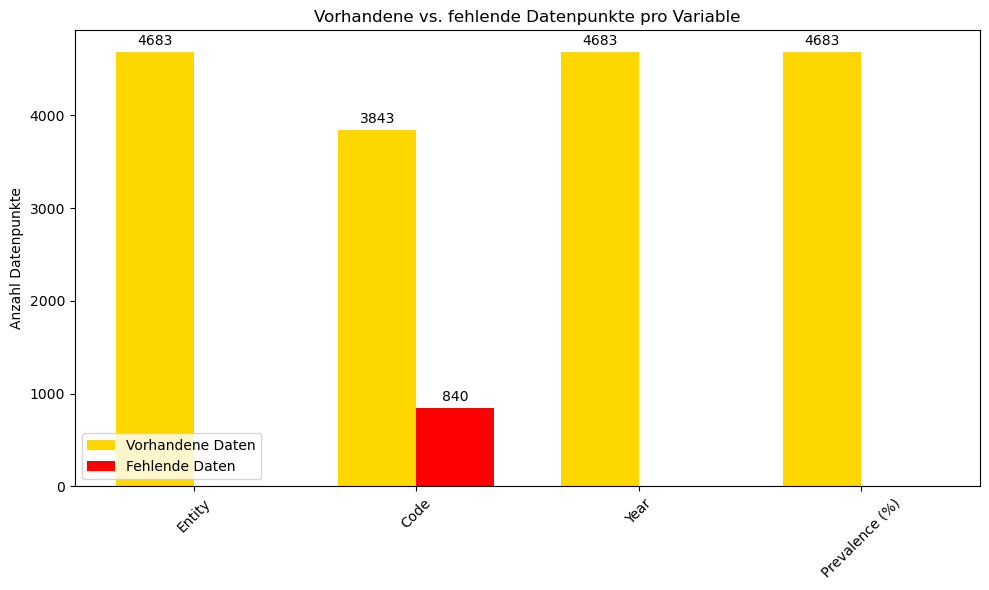

In [18]:
import matplotlib.pyplot as plt
import numpy as np
variables = df.columns
present = df.count().values
missing = df.isna().sum().values
x = np.arange(len(variables))
width = 0.35

plt.figure(figsize=(10,6))
vorhanden_farbe = 'gold'
fehlend_farbe = 'red' 
rects1 = plt.bar(x - width/2, present, width, label='Vorhandene Daten', color=vorhanden_farbe)
rects2 = plt.bar(x + width/2, missing, width, label='Fehlende Daten', color=fehlend_farbe)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            plt.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 Punkte vertikaler Offset
                        textcoords="offset points",
                        ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)


plt.xticks(x, variables, rotation=45)
plt.ylabel("Anzahl Datenpunkte")
plt.title("Vorhandene vs. fehlende Datenpunkte pro Variable")
plt.legend()
plt.tight_layout()
plt.show()


Das Diagramm visualisiert die Anzahl der vorhandenen (gelb) und fehlenden (rot) Datenpunkte für vier Variablen: Entity, Code, Year und Prevalence (%). Das Ergebnis zeigt, dass nur die Variable 'Code' eine Anzahl fehlender Datenpunkte aufweist, während die anderen Variablen nahezu vollständig sind.

Erklärung der Funktionen welche wir für das Diagramm benötigt haben: 

1. Importierung:

import matplotlib.pyplot as plt
- Importiert die Plot-Bibliothek zum Zeichnen der Grafik

import numpy as np
- Importiert NumPy, um später Positionen der Balken zu berechnen

<br>
<br>
2. Variablen definieren:

variables = df.columns
- Speichert alle Spaltennamen des DataFrames

present = df.count().values
-  Zählt für jede Spalte die vorhandenen (nicht-fehlenden) Werte

missing = df.isna().sum().values
- Zählt für jede Spalte die fehlenden Werte (NaN)

x = np.arange(len(variables))
- Erstellt Positionen 0,1,2,… für die Balken

width = 0.35
-  Legt die Breite der Balken fest

<br>
<br>
3. Plot vorbereiten:

plt.figure(figsize=(10,6))
- Erstellt eine Grafikfläche in der Größe 10×6

vorhanden_farbe = 'gold' / fehlend_farbe = 'red'
- Definiert die Farben der Balken

<br>
<br>
4. Balkendiagramm zeichnen:

rects1 = plt.bar(x - width/2, present, width, ...)
- Zeichnet links die Balken für vorhandene Daten

rects2 = plt.bar(x + width/2, missing, width, ...)
- Zeichnet rechts daneben die Balken für fehlende Daten

<br>
<br>
5. Balkenbeschriftung anwenden:

autolabel(rects1)
- Beschriftet „vorhandene Daten“

autolabel(rects2)
- Beschriftet „fehlende Daten“

<br>
<br>
6. Achsenbeschriftungen & Layout:

plt.xticks(x, variables, rotation=45)
- Beschriftet die X-Achse mit den Spaltennamen (gedreht um 45°)

plt.ylabel("Anzahl Datenpunkte")
- Y-Achse erhält eine Beschriftung

plt.title("Vorhandene vs. fehlende Datenpunkte pro Variable")
- Titel setzen

plt.legend()
- Legende anzeigen

plt.tight_layout()
- Sorgt dafür, dass nichts abgeschnitten wird

plt.show()
- Zeigt die fertige Grafik an

### 5.3 Wie ist die Verteilung der zu untersuchenden Variabel

5.3.1 Histogramm (Verteilung der Unterernährungsrate)

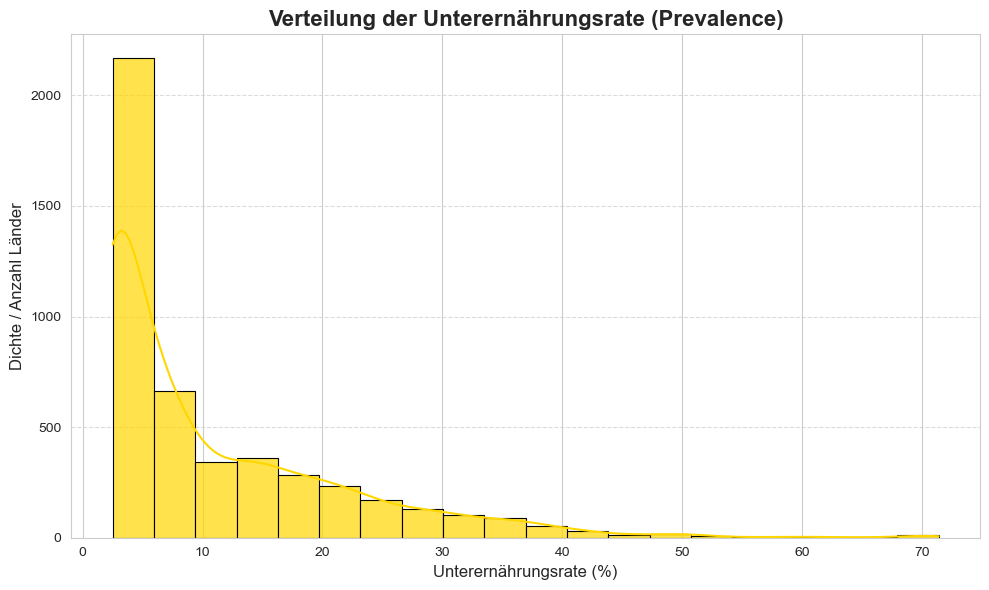

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.histplot(
    df['Prevalence (%)'].dropna(),
    bins=20,
    color='gold',
    edgecolor='black',
    kde=True,
    linewidth=0.8,
    alpha=0.7
)

plt.title("Verteilung der Unterernährungsrate (Prevalence)", fontsize=16, fontweight='bold')
plt.xlabel("Unterernährungsrate (%)", fontsize=12)
plt.ylabel("Dichte / Anzahl Länder", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Erklärung der Funktionen welche für das Diagramm benötigt wurden: 

1. Importe

import matplotlib.pyplot as plt
- Bibliothek zum Erstellen von Diagrammen

import pandas as pd
- Wird benötigt, um mit DataFrames zu arbeiten

import seaborn as sns
- Bietet moderne, schönere Diagramme auf Basis von Matplotlib 

<br>
<br>
2. Grafikfläche und Stil einstellen

plt.figure(figsize=(10, 6))
- Legt die Größe der Grafik fest (10 × 6)

sns.set_style("whitegrid")
- Hintergrundstil: Weißer Hintergrund mit Gitternetzlinien

<br>
<br>
3. Histogramm erstellen

df['Prevalence (%)'].dropna()
- Verwendet die Spalte Unterernährungsrate (%) und entfernt fehlende Werte.

bins=20
- Das Histogramm wird in 20 Klassen (Intervalle) unterteilt.

color='gold'
- Die Balken bekommen eine goldene Farbe.

edgecolor='black'
- Die Balken haben schwarze Ränder.

kde=True
- Zusätzlich wird eine KDE-Kurve gezeichnet (eine geglättete Dichtekurve).

linewidth=0.8
- Breite der Balkenumrandung.

alpha=0.7
- Transparenz der Balken (0 = durchsichtig, 1 = undurchsichtig).

<br>
<br>
4. Titel und Achsenbeschriftungen

plt.title("Verteilung der Unterernährungsrate (Prevalence)", fontsize=16, fontweight='bold')
- Setzt einen Titel für das Diagramm.

plt.xlabel("Unterernährungsrate (%)", fontsize=12)
- Beschriftet die X-Achse.

plt.ylabel("Dichte / Anzahl Länder", fontsize=12)
- Beschriftet die Y-Achse.

<br>
<br>
5. Gitterlinien

plt.grid(axis='y', linestyle='--', alpha=0.7)
- Fügt horizontale gestrichelte Gitterlinien hinzu.

<br>
<br>
6. Layout & Anzeige

plt.tight_layout()
- Sorgt für optimale Abstände im Diagramm.

plt.show()
- Zeigt die endgültige Grafik an.

Das Ergebnis des Histogramms zeigt eine stark rechtsschiefe Verteilung, bei der die überwiegende Mehrheit der Länder eine sehr niedrige Prävalenz von Unterernährung aufweist, während nur wenige Länder hohe Raten melden. Die Grafik verwendet 20 Bins, um die Häufigkeit der Länder (Anzahl Länder) über verschiedene Prävalenzbereiche (%) darzustellen.

5.3.2 Boxplot (Ausreisser und Quartile)

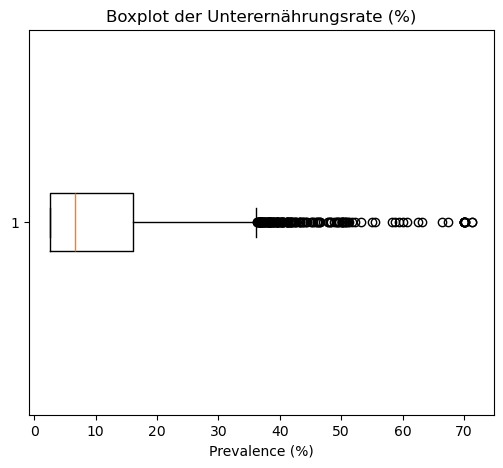

In [32]:
plt.figure(figsize=(6,5))
plt.boxplot(df['Prevalence (%)'].dropna(), vert=False)
plt.title("Boxplot der Unterernährungsrate (%)")
plt.xlabel("Prevalence (%)")
plt.show()

Um dieses Diagramm besser zu veranschaulichen: 

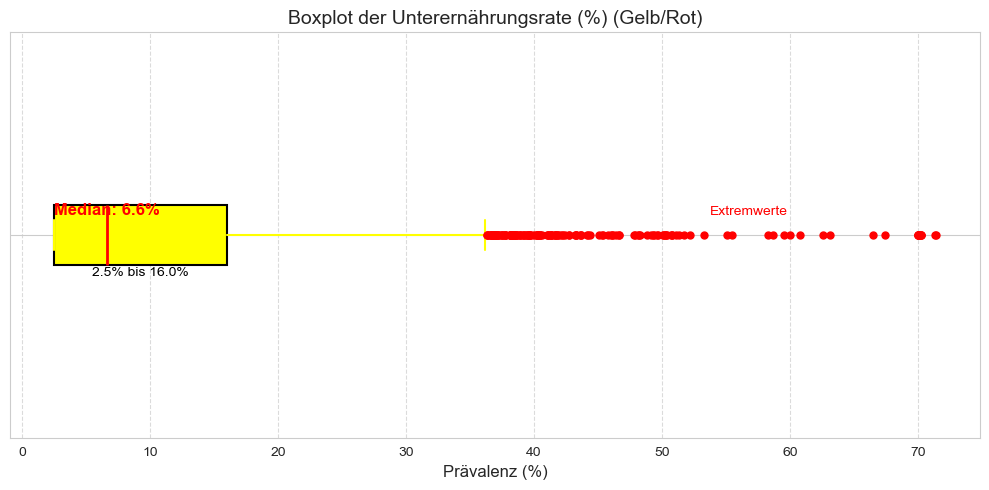

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_to_plot = df['Prevalence (%)'].dropna().values

Q1 = np.percentile(data_to_plot, 25)
Median = np.percentile(data_to_plot, 50)
Q3 = np.percentile(data_to_plot, 75)
IQR = Q3 - Q1
Upper_Whisker = Q3 + 1.5 * IQR

plt.figure(figsize=(10, 5))

bp = plt.boxplot(
    data_to_plot,
    vert=False,
    patch_artist=True,
    flierprops={'marker': 'o', 'markeredgecolor': 'red', 'markerfacecolor': 'red', 'markersize': 5}
)

for box in bp['boxes']:
    box.set(facecolor='yellow', edgecolor='black', linewidth=1.5)

for median in bp['medians']:
    median.set(color='red', linewidth=2)

for whisker in bp['whiskers']:
    whisker.set(color='yellow', linewidth=1.5)

for cap in bp['caps']:
    cap.set(color='yellow', linewidth=1.5)

plt.text(Median, 1.05, f'Median: {Median:.1f}%', ha='center', color='red', fontsize=12, fontweight='bold')

x_mitte_box = (Q1 + Q3) / 2
plt.text(x_mitte_box, 0.9, f'{Q1:.1f}% bis {Q3:.1f}%', ha='center', color='black', fontsize=10)

outliers = data_to_plot[data_to_plot > Upper_Whisker]
if len(outliers) > 0:
    max_outlier_display = np.percentile(outliers, 90)
    plt.text(max_outlier_display, 1.05, f'Extremwerte', ha='right', color='red', fontsize=10)

plt.title("Boxplot der Unterernährungsrate (%) (Gelb/Rot)", fontsize=14)
plt.xlabel("Prävalenz (%)", fontsize=12)
plt.yticks([1], [""])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Das Ergebnis des Boxplots zeigt, dass die Mehrheit der Länder eine niedrige Unterernährungsrate hat (Median bei 6.6% , 50% der Daten zwischen ca. 2.5% und 16%), aber eine grosse Anzahl von Ausreissern mit sehr hohen Raten bis zu 70% existiert. Der Boxplot verdeutlicht somit die stark schiefe Verteilung der Daten und die Existenz extremer Werte in einigen Ländern.

1. Datenvorbereitung und Kennzahlen:

import matplotlib.pyplot as plt

-Importiert die Bibliothek Matplotlib für das Plotten und gibt ihr das Kürzel plt.

import numpy as np

- Importiert NumPy für numerische Berechnungen (z. B. Perzentile).

data_to_plot = df['Prevalence (%)'].dropna().values

- Extrahiert die Daten aus der Spalte "Prevalence (%)", entfernt fehlende Werte und speichert sie als NumPy-Array.

Q1 = np.percentile(data_to_plot, 25)

- Berechnet das 1. Quartil (25. Perzentil).

Median = np.percentile(data_to_plot, 50)

- Berechnet den Median.

Q3 = np.percentile(data_to_plot, 75)

- Berechnet das 3. Quartil (75. Perzentil).

IQR = Q3 - Q1

- Berechnet den Interquartilsabstand.

Upper_Whisker = Q3 + 1.5 * IQR

- Definiert die Obergrenze für potenzielle Ausreißer nach der üblichen 1.5×IQR-Regel.

<br>
<br>
2. Plot-Erstellung und Basisformatierung:

plt.figure(figsize=(10, 5))

- Erstellt eine neue Grafik in der Größe 10×5.

bp = plt.boxplot(...)

- Generiert den Boxplot. Die Variable bp enthält alle Elemente des Plots.

<br>
<br>
Parameter:

data_to_plot → Die zu visualisierenden Werte

vert=False → Boxplot wird horizontal ausgegeben

patch_artist=True → Ermöglicht farbige Boxen

flierprops={...} → Stil der Ausreißer (rote Kreise, Größe 5)

<br>
<br>

3. Detailformatierung der Plot-Elemente Boxen färben:

for box in bp['boxes']:
Iteriert über die Box-Elemente.

box.set(facecolor='yellow', edgecolor='black', linewidth=1.5)
→ Gelbe Box, schwarzer Rand, dicke Linien.

<br>
<br>
Median-Linie

for median in bp['medians']:
Färbt die Medianlinie:

median.set(color='red', linewidth=2)


4. Textbeschriftungen und Diagramm-Metadaten

plt.text(Median, 1.05, ...)
- Platziert den Medianwert als roten Text leicht oberhalb der Box.

x_mitte_box = (Q1 + Q3) / 2
- Berechnet die horizontale Mitte der Box.

plt.text(x_mitte_box, 0.9, ...)
- Beschriftet den Bereich von Q1 bis Q3.

<br>
<br>
Ausreisser analysieren

outliers = data_to_plot[data_to_plot > Upper_Whisker]
Identifiziert alle Werte oberhalb des oberen Whiskers.

if len(outliers) > 0:
- Prüft, ob Ausreißer existieren.

max_outlier_display = np.percentile(outliers, 90)
- Berechnet ein repräsentatives Ausreißer-Perzentil für die Textplatzierung.

plt.text(max_outlier_display, 1.05, 'Extremwerte', color='red')
- Beschriftet die extremen Werte.

<br>
<br>
5. Diagrammgestaltung

plt.title('Boxplot der Unterernährungsrate (Gelb/Rot)', fontsize=14)
- Setzt den Diagrammtitel.

plt.xlabel('Prävalenz (%)', fontsize=12)
- Beschriftet die x-Achse.

plt.yticks([1], [''])
- Entfernt die y-Achsenbeschriftung (nur eine Kategorie).

plt.grid(axis='x', linestyle='--', alpha=0.7)
- Fügt horizontale gestrichelte Hilfslinien hinzu.

plt.tight_layout()
- Optimiert die Layoutabstände.

plt.show()
- Gibt die finale Grafik aus.

5.3.3 Säulendiagramm für Anzahl Datenpunkte pro Jahr

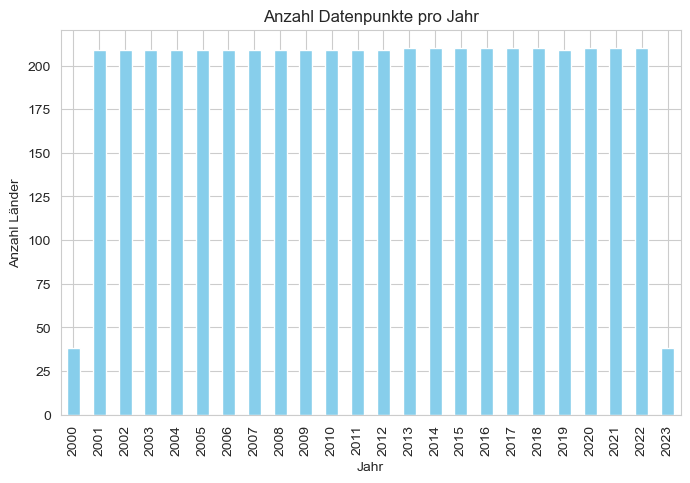

In [29]:
plt.figure(figsize=(8,5))
df['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Anzahl Datenpunkte pro Jahr")
plt.xlabel("Jahr")
plt.ylabel("Anzahl Länder")
plt.show()

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Importiert, falls für komplexe Datenverarbeitung benötigt

def plot_custom_bar_chart(df, column_name='Year'):
    # Sicherstellen, dass die Spalte existiert und Daten enthält
    if df.empty or column_name not in df.columns or len(df[column_name].dropna()) < 2:
        print(f"Fehler: Daten sind unvollständig oder Spalte '{column_name}' fehlt.")
        return

    # 1. Daten vorbereiten und Häufigkeiten (Counts) berechnen
    counts = df[column_name].value_counts().sort_index()
    years = counts.index
    bar_heights = counts.values
    
    # 2. Die zwei kleinsten Häufigkeiten identifizieren
    smallest_two_indices = counts.nsmallest(2).index
    
    # 3. Farb-Array erstellen und die kleinsten auf Rot setzen
    colors = ['yellow'] * len(counts)
    
    for i, year in enumerate(years):
        if year in smallest_two_indices:
            colors[i] = 'red'

    plt.figure(figsize=(10, 6))
    
    # 4. Diagramm plotten
    bars = plt.bar(years.astype(str), bar_heights, color=colors)

    # 5. Beschriftung (Anzahl) der zwei kleinsten Säulen hinzufügen
    for i, bar in enumerate(bars):
        year = years[i]
        count = bar_heights[i]
        
        if year in smallest_two_indices:
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 0.5,
                f'{count}',
                ha='center',
                va='bottom',
                color='red',
                fontsize=11,
                fontweight='bold'
            )

    # 6. Achsen und Titel setzen
    plt.title('Anzahl Datenpunkte pro Jahr (Kleinste Säulen hervorgehoben)', fontsize=14)
    plt.xlabel('Jahr')
    plt.ylabel('Anzahl Länder')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # 7. Der Befehl zum Anzeigen des Diagramms
    plt.show()

Das Ergebnis in der Grafik zeigt eine nahezu vollständige Datenerfassung für alle Jahre von 2001 bis 2022 (jeweils über 200 Länder), während die Jahre 2000 und 2023 deutlich weniger Datenpunkte aufweisen. Das Diagramm visualisiert, dass der Datensatz in den Jahren 2001 bis 2022 am umfassendsten ist und die extrem niedrigen Balken am Anfang und Ende des Zeitraums die unvollständige Verfügbarkeit für diese spezifischen Jahre hervorheben.

## 6 Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

### 6.1 Streudiagramm (Scatterplot)

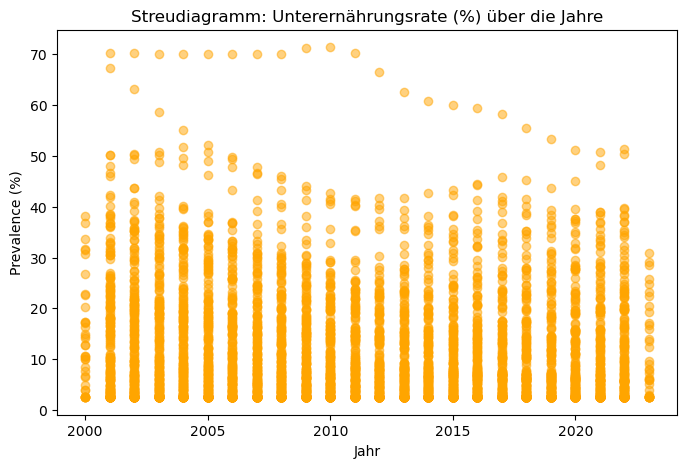

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['Year'], df['Prevalence (%)'], alpha=0.5, color='orange')
plt.title("Streudiagramm: Unterernährungsrate (%) über die Jahre")
plt.xlabel("Jahr")
plt.ylabel("Prevalence (%)")
plt.show()

### 6.2 Korrelationsmatrix

In [35]:
numeric_vars = df[['Year', 'Prevalence (%)']]

corr_matrix = numeric_vars.corr()
print("Korrelationsmatrix:")
print(corr_matrix)

Korrelationsmatrix:
                    Year  Prevalence (%)
Year            1.000000       -0.125489
Prevalence (%) -0.125489        1.000000


## 7 Analyse

### 7.1 Spezifische Untersuchung der Fragestellung

- Fragestellung 1: Wie hat sich der Anteil unterernährter Menschen weltweit zwischen 2000 und 2023 verändert?

=== Durchschnittlicher Anteil unterernährter Menschen pro Jahr ===
    Year  Prevalence (%)
0   2000       14.305263
1   2001       14.355981
2   2002       14.041627
3   2003       13.725359
4   2004       13.315311
5   2005       12.817703
6   2006       12.232536
7   2007       11.739234
8   2008       11.289952
9   2009       10.808134
10  2010       10.324402
11  2011        9.951196
12  2012        9.758373
13  2013        9.601905
14  2014        9.540000
15  2015        9.670952
16  2016        9.740000
17  2017        9.711905
18  2018        9.676190
19  2019        9.655981
20  2020        9.996190
21  2021       10.307143
22  2022       10.456667
23  2023       11.050000


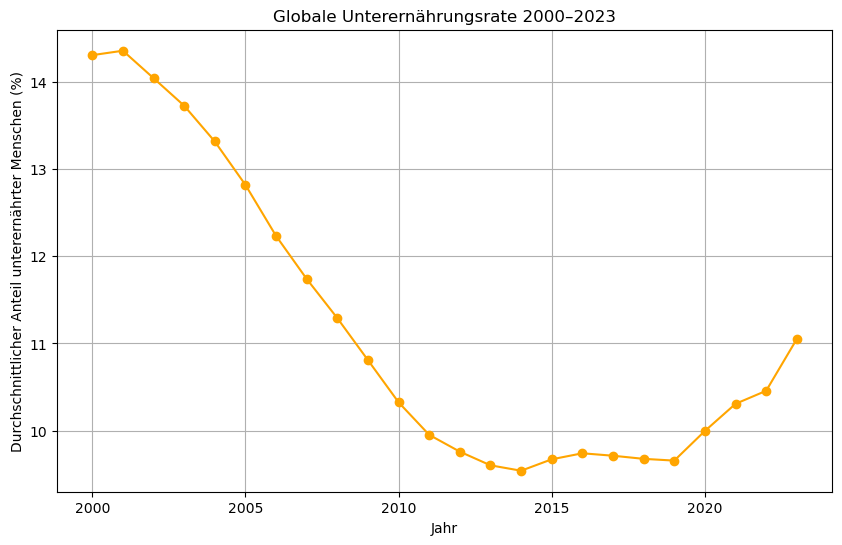


Anteil 2000: 14.31%
Anteil 2023: 11.05%
Absolute Veränderung: -3.26 Prozentpunkte
Relative Veränderung: -22.76%


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Globale Mittelwerte pro Jahr berechnen ---
global_trend = df.groupby('Year')['Prevalence (%)'].mean().reset_index()

print("=== Durchschnittlicher Anteil unterernährter Menschen pro Jahr ===")
print(global_trend)

# --- 2. Grafische Darstellung: Zeitreihe ---
plt.figure(figsize=(10,6))
plt.plot(global_trend['Year'], global_trend['Prevalence (%)'], marker='o', color='orange')
plt.title("Globale Unterernährungsrate 2000–2023")
plt.xlabel("Jahr")
plt.ylabel("Durchschnittlicher Anteil unterernährter Menschen (%)")
plt.grid(True)
plt.show()

# --- 3. Veränderung berechnen ---
start_year = 2000
end_year = 2023

start_value = global_trend[global_trend['Year']==start_year]['Prevalence (%)'].values[0]
end_value = global_trend[global_trend['Year']==end_year]['Prevalence (%)'].values[0]

absolute_change = end_value - start_value
relative_change = (absolute_change / start_value) * 100

print(f"\nAnteil 2000: {start_value:.2f}%")
print(f"Anteil 2023: {end_value:.2f}%")
print(f"Absolute Veränderung: {absolute_change:.2f} Prozentpunkte")
print(f"Relative Veränderung: {relative_change:.2f}%")

Die bereitgestellte Auflistung und der Code zeigen eine signifikante Veränderung des durchschnittlichen Anteils unterernährter Menschen weltweit zwischen 2000 und 2023.

Zentrale Aussagen und Zusammenhänge:

- Initialer Rückgang: Der Anteil begann im Jahr 2000 bei 14,31 % und sank kontinuierlich bis zu einem Tiefpunkt von etwa 9,54 % im Jahr 2014, was auf positive globale Entwicklungen in diesem Zeitraum hindeutet.

- Stagnation und Anstieg: Ab 2015 stagnierte die Rate und begann leicht anzusteigen, besonders bemerkbar zwischen 2019 und 2023, wo sie von 9,66 % auf 11,05 % anstieg.

- Gesamtveränderung: Über den gesamten Zeitraum von 2000 bis 2023 gab es eine absolute Reduzierung um -3,26 Prozentpunkte oder eine relative Veränderung von -22,76 %.


Die Grafik ergänzt die vorherigen Analysen und visualisiert den globalen Trend der Unterernährungsrate zwischen 2000 und 2023.

- Rückläufiger Trend: Von 2000 bis etwa 2014/2015 war ein deutlicher Rückgang des durchschnittlichen Anteils unterernährter Menschen zu verzeichnen, von etwa 14,5 % auf unter 10 %.

- Stagnation und Anstieg: Ab 2015 stagnierten die Raten und stiegen dann insbesondere ab 2019 bis 2023 wieder leicht an, auf etwa 11 %.

- Gesamtaussage: Die Darstellung zeigt, dass die globalen Bemühungen zur Reduzierung der Unterernährung über weite Strecken erfolgreich waren, jedoch in den letzten Jahren durch neue Herausforderungen (wie z.B. Krisen, Pandemien) wieder Rückschläge erfahren haben.


#### Hintergrundanalyse zur Veränderung des weltweiten Unterernährungsanteils
Erklärung des Rückgangs des Anteils unterernährter Menschen: 

Die weltweite Unterernährung ging zurück, weil sich in vielen Entwicklungs- und Schwellenländern die wirtschaftlichen Bedingungen deutlich verbesserten. Durch anhaltendes Wirtschaftswachstum stiegen die Einkommen breiter Bevölkerungsgruppen, und die Armut nahm spürbar ab, was den Zugang zu Nahrungsmitteln für immer mehr Menschen erleichterte. Parallel dazu erhöhte sich die landwirtschaftliche Produktivität, da moderne Anbaumethoden, technologische Fortschritte und steigende Ernteerträge die Lebensmittelversorgung stabiler und reichhaltiger machten. 
In mehreren Regionen trugen zudem gezielte politische Massnahmen und Sozialprogramme dazu bei, die Ernährungssicherheit vor allem für besonders gefährdete Haushalte zu stärken, etwa durch Schulspeisungen, direkte Unterstützungsleistungen oder umfassende Agrarreformen. Ergänzend wirkten Fortschritte im Gesundheitswesen, in der Bildung sowie im Bereich Wasser und Sanitärversorgung unterstützend, indem sie die allgemeine Lebenssituation verbesserten und gesundheitliche Belastungen reduzierten, sodass Nährstoffe besser aufgenommen und verwertet werden konnten. Zusammengenommen führten diese wirtschaftlichen, landwirtschaftlichen, politischen und sozialen Entwicklungen zu einem deutlichen Rückgang der Unterernährung.
- Quelle: https://openknowledge.fao.org/server/api/core/bitstreams/63863832-4cb5-4e05-9040-4b22d9a92324/content

### Fragestellung 2: Welche 6 Länder sind im Jahr 2023 am stärksten von Unterernährung betroffen?

Letztes Jahr mit echten Länderwerten: 2022

Top-6 Länder mit der höchsten Unterernährung im Jahr 2022:
          Entity  Prevalence (%)
3745     Somalia            51.3
1693       Haiti            50.4
2477  Madagascar            39.7
4638       Yemen            39.5
2295     Liberia            38.4
4682    Zimbabwe            38.1


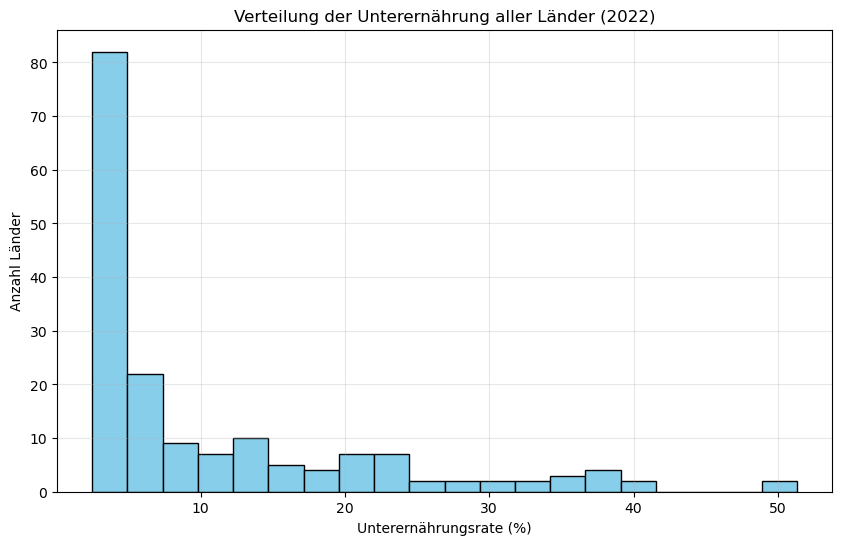

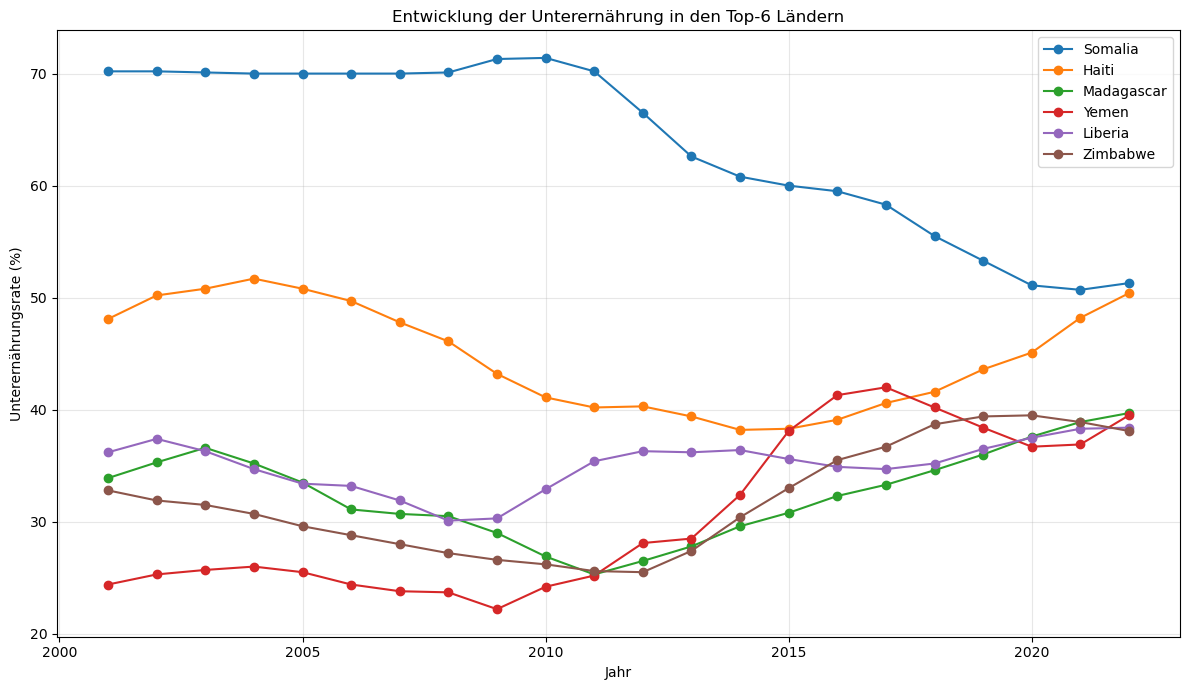

In [37]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

# 1) Daten laden
zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

# 2) Spalte umbenennen
old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

# 3) Nur echte Länder
df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

# 4) Letztes Jahr, für das **echte Länder** Werte existieren
latest_year = df_countries["Year"].max()
df_latest = df_countries[df_countries["Year"] == latest_year]

print(f"Letztes Jahr mit echten Länderwerten: {latest_year}")

# 5) Top-6 Länder
top6 = df_latest.sort_values("Prevalence (%)", ascending=False).head(6)
print(f"\nTop-6 Länder mit der höchsten Unterernährung im Jahr {latest_year}:")
print(top6[["Entity", "Prevalence (%)"]])

# 6) Histogramm
plt.figure(figsize=(10,6))
plt.hist(df_latest["Prevalence (%)"], bins=20, color='skyblue', edgecolor='black')
plt.title(f"Verteilung der Unterernährung aller Länder ({latest_year})")
plt.xlabel("Unterernährungsrate (%)")
plt.ylabel("Anzahl Länder")
plt.grid(True, alpha=0.3)
plt.show()

# 7) Liniendiagramm für Top-6 Länder
df_top6_over_time = df[df["Entity"].isin(top6["Entity"])]

plt.figure(figsize=(12,7))
for country in top6["Entity"]:
    country_data = df_top6_over_time[df_top6_over_time["Entity"] == country]
    plt.plot(country_data["Year"], country_data["Prevalence (%)"], marker='o', label=country)

plt.title("Entwicklung der Unterernährung in den Top-6 Ländern")
plt.xlabel("Jahr")
plt.ylabel("Unterernährungsrate (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

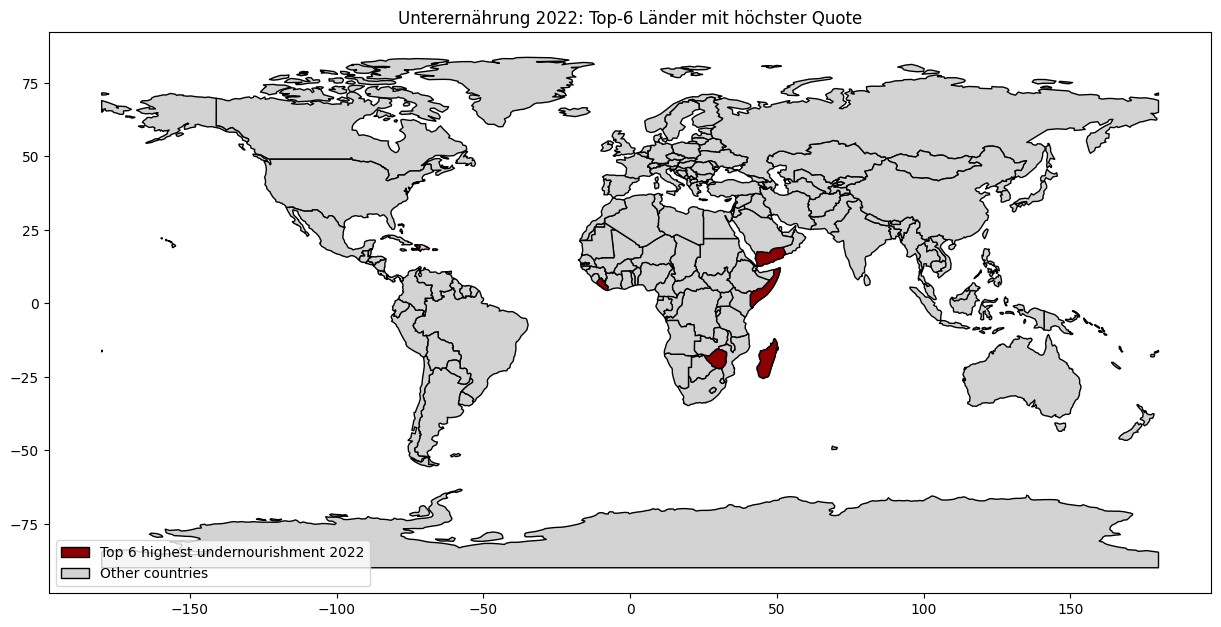

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- Top-6 Länder mit höchster Unterernährung ---
top6_highest = ["Somalia", "Haiti", "Madagascar", "Yemen", "Liberia", "Zimbabwe"]

# --- Weltkarte laden ---
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world.rename(columns={"ADMIN": "name"})

# --- Spalte für Markierung ---
world['top6_highest'] = world['name'].apply(lambda x: x in top6_highest)

# --- Karte plotten ---
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
world[world['top6_highest']].plot(ax=ax, color='darkred', edgecolor='black')

# --- Legende manuell ---
legend_elements = [
    Patch(facecolor='darkred', edgecolor='black', label='Top 6 highest undernourishment 2022'),
    Patch(facecolor='lightgray', edgecolor='black', label='Other countries')
]
ax.legend(handles=legend_elements, loc='lower left')

plt.title("Unterernährung 2022: Top‑6 Länder mit höchster Quote")
plt.show()

Bildgröße: (1600, 1600)


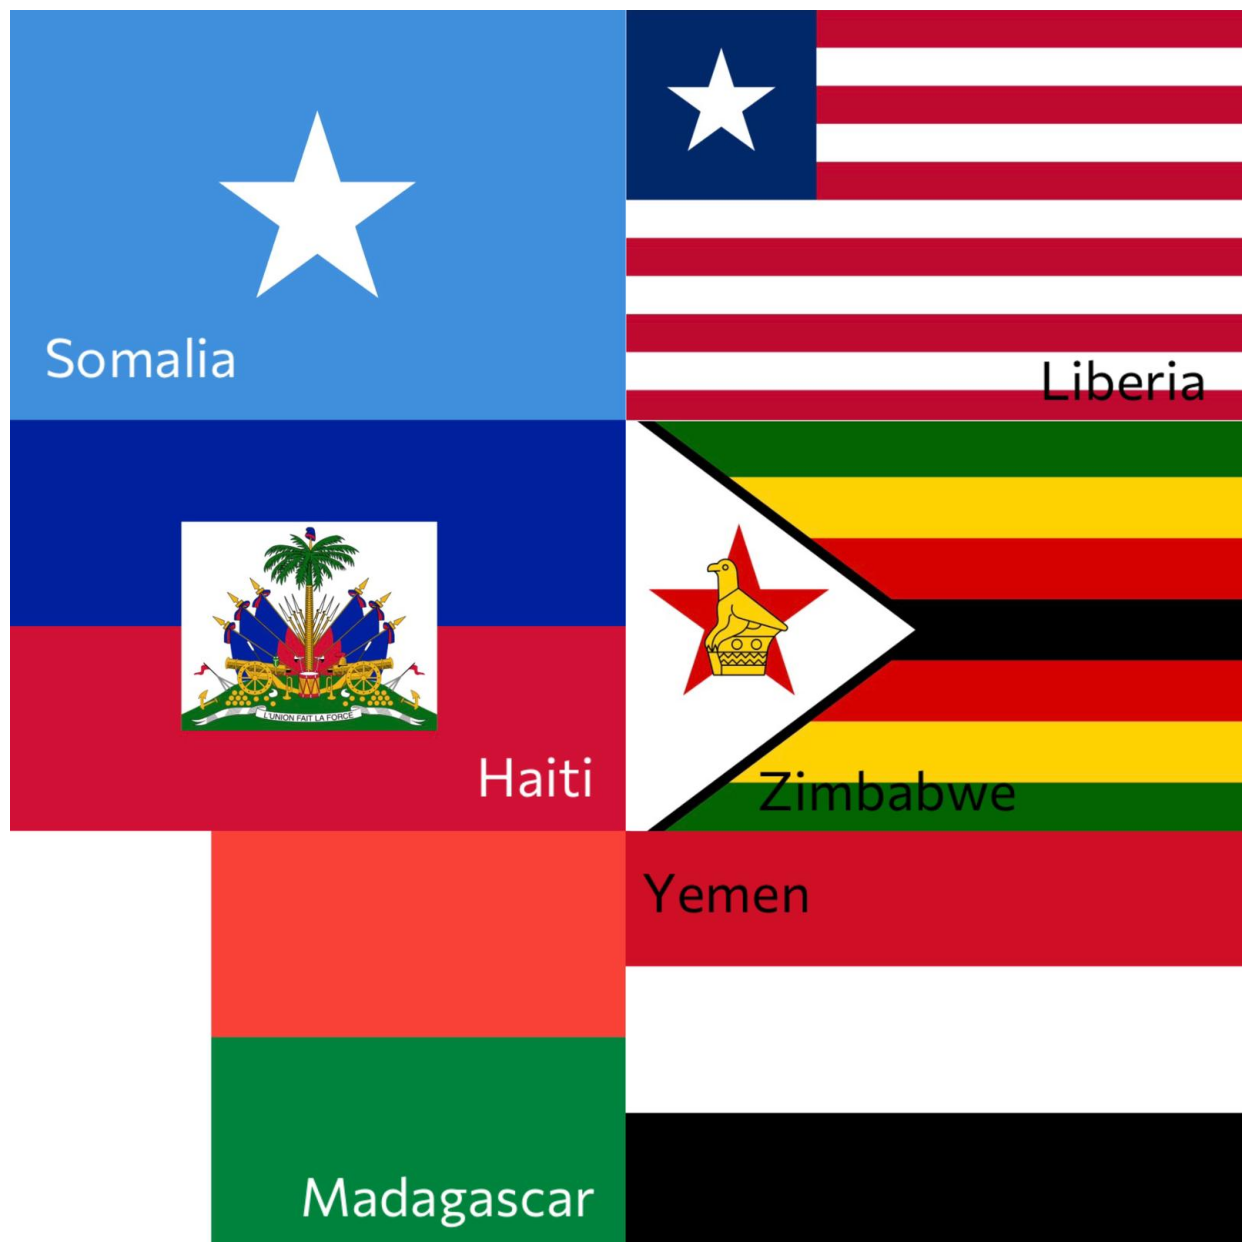

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('Bild_2.jpeg')

print("Bildgröße:", img.size)

plt.figure(figsize=(img.width/100, img.height/100), dpi=100)
plt.imshow(img)
plt.axis('off') 
plt.show()

### Fragestellung 3: Welche 6 Länder sind im Jahr 2023 am niedrigsten von Unterernährung betroffen?

Letztes Jahr mit echten Länderwerten: 2022

Top-6 Länder mit der niedrigsten Unterernährung im Jahr 2022:
        Entity  Prevalence (%)
89     Algeria             2.5
247    Austria             2.5
225  Australia             2.5
179    Armenia             2.5
335    Belarus             2.5
357    Belgium             2.5


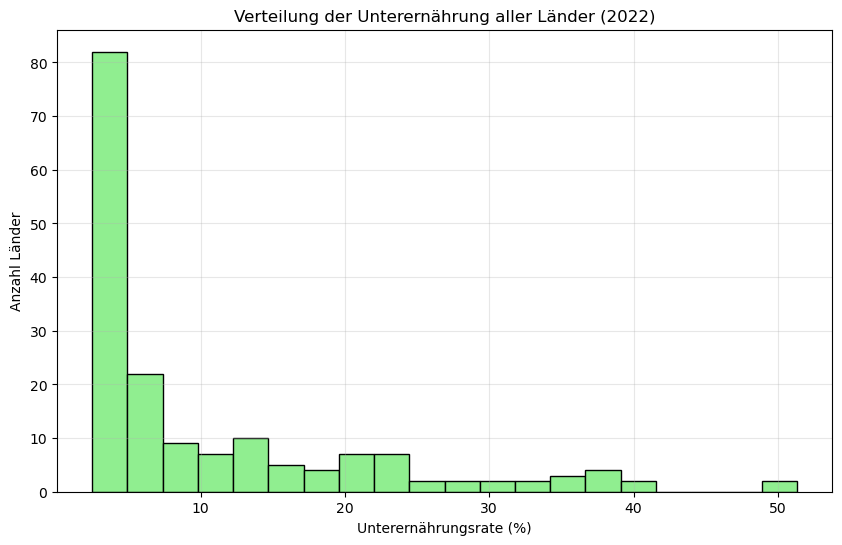

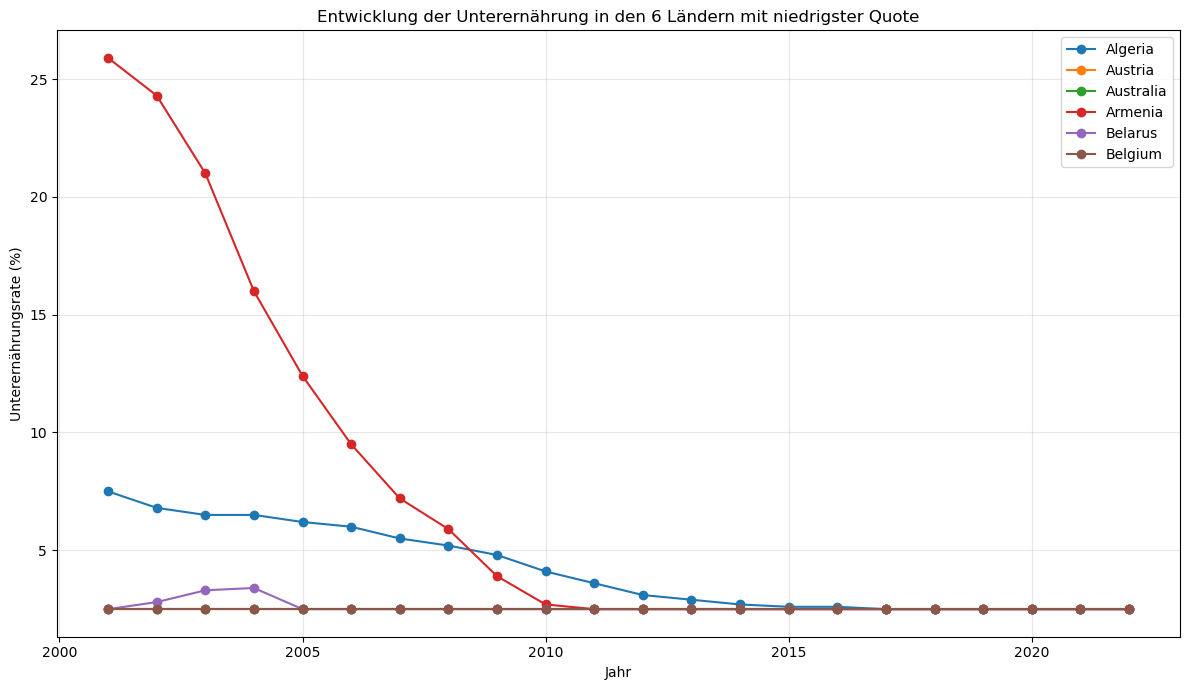

In [38]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

# 1) Daten laden
zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

# 2) Spalte umbenennen
old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

# 3) Nur echte Länder
df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

# 4) Letztes Jahr, für das echte Länder Werte existieren
latest_year = df_countries["Year"].max()
df_latest = df_countries[df_countries["Year"] == latest_year]

print(f"Letztes Jahr mit echten Länderwerten: {latest_year}")

# 5) Top-6 Länder mit niedrigster Unterernährung
bottom6 = df_latest.sort_values("Prevalence (%)", ascending=True).head(6)
print(f"\nTop-6 Länder mit der niedrigsten Unterernährung im Jahr {latest_year}:")
print(bottom6[["Entity", "Prevalence (%)"]])

# 6) Histogramm
plt.figure(figsize=(10,6))
plt.hist(df_latest["Prevalence (%)"], bins=20, color='lightgreen', edgecolor='black')
plt.title(f"Verteilung der Unterernährung aller Länder ({latest_year})")
plt.xlabel("Unterernährungsrate (%)")
plt.ylabel("Anzahl Länder")
plt.grid(True, alpha=0.3)
plt.show()

# 7) Liniendiagramm für Bottom-6 Länder
df_bottom6_over_time = df[df["Entity"].isin(bottom6["Entity"])]

plt.figure(figsize=(12,7))
for country in bottom6["Entity"]:
    country_data = df_bottom6_over_time[df_bottom6_over_time["Entity"] == country]
    plt.plot(country_data["Year"], country_data["Prevalence (%)"], marker='o', label=country)

plt.title("Entwicklung der Unterernährung in den 6 Ländern mit niedrigster Quote")
plt.xlabel("Jahr")
plt.ylabel("Unterernährungsrate (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Es gibt sehr viele Länder die dieselbe, niedrigste Unterernährungsrate haben. Auf der Grafik wurden nur aus alphabetischer Reihenfolge aufgelistet. Die Schweiz gehört auch zu den 2.5%!

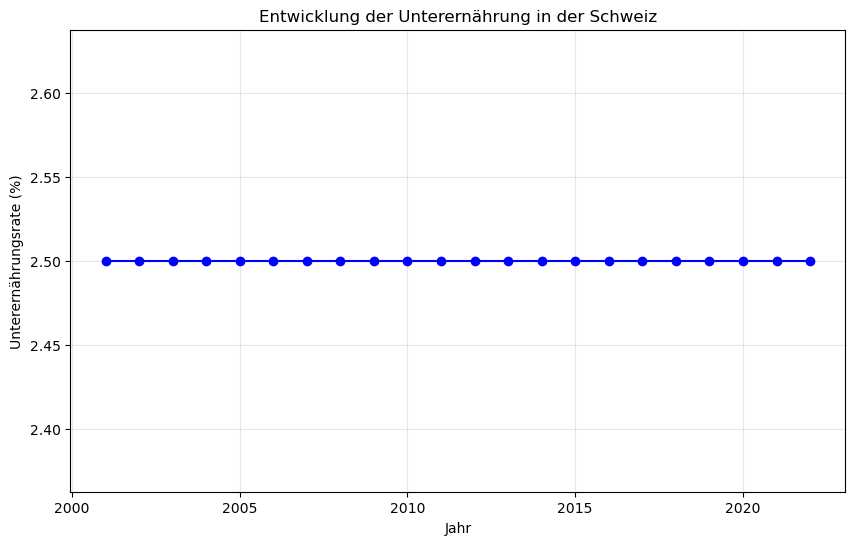

      Year  Prevalence (%)
4035  2001             2.5
4036  2002             2.5
4037  2003             2.5
4038  2004             2.5
4039  2005             2.5
4040  2006             2.5
4041  2007             2.5
4042  2008             2.5
4043  2009             2.5
4044  2010             2.5
4045  2011             2.5
4046  2012             2.5
4047  2013             2.5
4048  2014             2.5
4049  2015             2.5
4050  2016             2.5
4051  2017             2.5
4052  2018             2.5
4053  2019             2.5
4054  2020             2.5
4055  2021             2.5
4056  2022             2.5


In [39]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

# 1) Daten laden
zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"

with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

# 2) Spalte umbenennen
old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

# 3) Nur echte Länder
df_countries = df[df["Code"].notna()]
df_countries = df_countries[df_countries["Code"].str.len() == 3]
df_countries = df_countries.dropna(subset=["Prevalence (%)"])

# 4) Nur die Schweiz filtern
df_switzerland = df_countries[df_countries["Entity"] == "Switzerland"]

# 5) Verlauf plotten
plt.figure(figsize=(10,6))
plt.plot(df_switzerland["Year"], df_switzerland["Prevalence (%)"], marker='o', color='blue')
plt.title("Entwicklung der Unterernährung in der Schweiz")
plt.xlabel("Jahr")
plt.ylabel("Unterernährungsrate (%)")
plt.grid(True, alpha=0.3)
plt.show()

# 6) Optional: Tabelle anzeigen
print(df_switzerland[["Year", "Prevalence (%)"]])

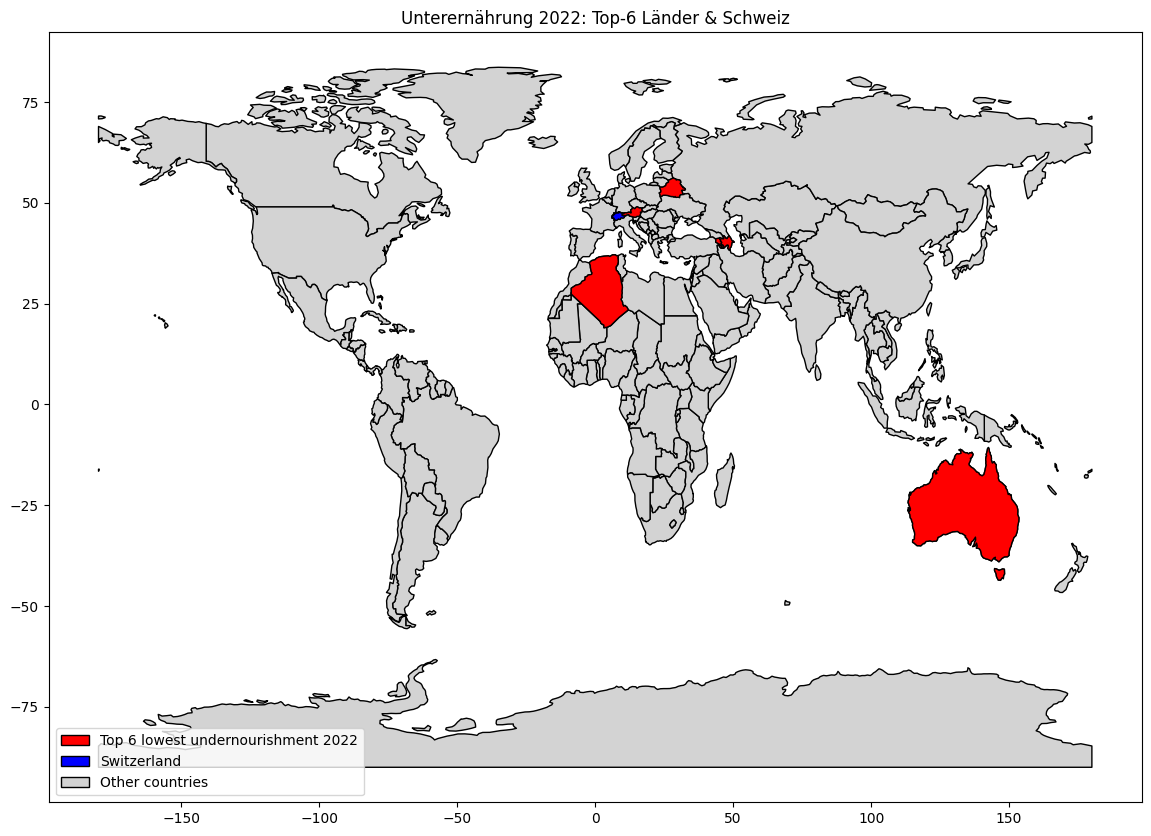

In [3]:
import geopandas as gpd
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- CSV laden ---
zip_path = "prevalence-of-undernourishment.zip"
file_name = "prevalence-of-undernourishment.csv"
with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        df = pd.read_csv(f)

old_col_name = next(col for col in df.columns if "Prevalence of undernourishment" in col)
df = df.rename(columns={old_col_name: "Prevalence (%)"})

df_2022 = df[df['Year'] == 2022]
top6 = df_2022.nsmallest(6, 'Prevalence (%)')['Entity'].tolist()
switzerland = ["Switzerland"]

# --- Weltkarte laden ---
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
world = world.rename(columns={"ADMIN": "name"})

# --- Spalten für Markierung ---
world['top6'] = world['name'].apply(lambda x: x in top6)
world['switzerland'] = world['name'].apply(lambda x: x in switzerland)

# --- Karte plotten ---
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')
world[world['top6']].plot(ax=ax, color='red', edgecolor='black')
world[world['switzerland']].plot(ax=ax, color='blue', edgecolor='black')

# --- Legende manuell ---
legend_elements = [
    Patch(facecolor='red', edgecolor='black', label='Top 6 lowest undernourishment 2022'),
    Patch(facecolor='blue', edgecolor='black', label='Switzerland'),
    Patch(facecolor='lightgray', edgecolor='black', label='Other countries')
]
ax.legend(handles=legend_elements, loc='lower left')

plt.title("Unterernährung 2022: Top‑6 Länder & Schweiz")
plt.show()

### Fragestellung 4: Gibt es einen Zusammenhang zwischen Unterernährung und wirtschaftlichen Faktoren?

### Fragestellung 5: Gibt es Regionen, in denen die Unterernährungsrate besonders stark gesunken oder gestiegen ist?

## Unsere Datenquellen:
-  https://ourworldindata.org/hunger-and-undernourishment
